## EJERCICIO TÉCNICO - MÓDULO 3

In [8]:
# Importamos las librerias necesarias para el ejercicio
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np
import re

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None) # ver todas las filas de los DataFrames

nota: No se importaron librerias avanzadas de imputación en este caso debido a que la naturaleza de las columnas con datos nulos del dataset no lo requieren.

In [9]:
# Cargamos los archivos csv
df_flight = pd.read_csv('Customer Flight Activity.csv')
df_loyalty = pd.read_csv('Customer Loyalty History.csv')

## Fase 1: Exploración y Limpieza

### 1.1. Exploración Inicial:

In [11]:
# FUNCION EDA BASICO
def eda_basico(df):

    print('🌷Ejemplo de datos del DF:')
    display(df.head(3))
    display(df.tail(3))
    display(df.sample(3))
    print('________________________________________________________________________________________________________')

    print('🌻Número de Filas:')
    display(df.shape[0])
    print('________________________________________________________________________________________________________')

    print('🌱Número de Columnas:')
    display(df.shape[1])
    print('________________________________________________________________________________________________________')

    print('🌼Información de la tabla:')
    display(df.info())
    print('________________________________________________________________________________________________________')

    print('🌑Nombre de las columnas:')
    display(df.columns)
    print('________________________________________________________________________________________________________')

    print('🍄Descripción de los datos numéricos:')
    display(df.describe().T)
    print('________________________________________________________________________________________________________')

    print('🌋Descripción de los datos no-numéricos:')
    cols_text = df.select_dtypes(include=['object', 'string']).columns
    if len(cols_text) > 0:
        print(f'Columnas categóricas detectadas: {list(cols_text)}')
        display(df.describe(include=['object', 'string']).T)
    else:
        print('⚠️ No hay columnas no-numéricas (tipo object o string) en el DataFrame.')
    print('________________________________________________________________________________________________________')

    print('🍂Saber si hay datos únicos:')
    display(df.nunique())
    print('________________________________________________________________________________________________________')

    print('🐖Qué datos son nulos por columnas:')
    display(df.isnull().sum())
    print('________________________________________________________________________________________________________')

    print('🐲Filas duplicadas:')
    total_duplicados = df.duplicated().sum()
    if total_duplicados > 0:
        print(f'Cantidad de duplicados: {total_duplicados}')
        print('Primeros duplicados:')
        display(df[df.duplicated()].head(3))
    else:
        print('No hay duplicados')
    print('________________________________________________________________________________________________________')

    print('🪹 Columnas constantes (solo 1 valor único):')
    constantes = df.columns[df.nunique() <= 1]
    if len(constantes) > 0:
        print(f'{len(constantes)} columnas con 1 valor único:')
        display(constantes)
    else:
        print('No hay columnas constantes')
    print('________________________________________________________________________________________________________')

    print('🚀 Valores únicos en columnas categóricas:')
    for col in df.select_dtypes(include=['object', 'string']):
        print(f'🔸 {col}')
        print('-----------------------------')
        print(df[col].unique())
        print('________________________________________________________________________________________________________')

    print('🧬 Tipos de datos por columna:')
    display(df.dtypes.value_counts())
    print('________________________________________________________________________________________________________')


#### EXPLORACIÓN INICIAL DE df_flight 

In [12]:
eda_basico(df_flight)

🌷Ejemplo de datos del DF:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0
405623,999986,2018,12,0,0,0,0,0.0,0,0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
119274,152338,2017,8,1,1,2,1982,198.0,0,0
34118,116999,2017,3,0,0,0,0,0.0,0,0
367855,503257,2018,8,6,6,12,1320,132.0,731,59


________________________________________________________________________________________________________
🌻Número de Filas:


405624

________________________________________________________________________________________________________
🌱Número de Columnas:


10

________________________________________________________________________________________________________
🌼Información de la tabla:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB

None

________________________________________________________________________________________________________
🌑Nombre de las columnas:


Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

________________________________________________________________________________________________________
🍄Descripción de los datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


________________________________________________________________________________________________________
🌋Descripción de los datos no-numéricos:
⚠️ No hay columnas no-numéricas (tipo object o string) en el DataFrame.
________________________________________________________________________________________________________
🍂Saber si hay datos únicos:


Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
dtype: int64

________________________________________________________________________________________________________
🐖Qué datos son nulos por columnas:


Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

________________________________________________________________________________________________________
🐲Filas duplicadas:
Cantidad de duplicados: 1864
Primeros duplicados:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0


________________________________________________________________________________________________________
🪹 Columnas constantes (solo 1 valor único):
No hay columnas constantes
________________________________________________________________________________________________________
🚀 Valores únicos en columnas categóricas:
🧬 Tipos de datos por columna:


int64      9
float64    1
Name: count, dtype: int64

________________________________________________________________________________________________________


#### EXPLORACIÓN INICIAL DE df_loyalty

In [13]:
eda_basico(df_loyalty)

🌷Ejemplo de datos del DF:


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
11117,165224,Canada,Alberta,Peace River,T9O 2W2,Female,Bachelor,57510.0,Single,Star,2574.02,Standard,2016,8,2017.0,4.0
6192,545541,Canada,Nova Scotia,Halifax,B3J 9S2,Male,Bachelor,83672.0,Married,Nova,4887.79,Standard,2013,1,NaN,NaN
2696,638389,Canada,Ontario,Toronto,M8Y 4K8,Male,Bachelor,63652.0,Married,Aurora,8649.18,Standard,2014,9,NaN,NaN


________________________________________________________________________________________________________
🌻Número de Filas:


16737

________________________________________________________________________________________________________
🌱Número de Columnas:


16

________________________________________________________________________________________________________
🌼Información de la tabla:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    

None

________________________________________________________________________________________________________
🌑Nombre de las columnas:


Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

________________________________________________________________________________________________________
🍄Descripción de los datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


________________________________________________________________________________________________________
🌋Descripción de los datos no-numéricos:
Columnas categóricas detectadas: ['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Marital Status', 'Loyalty Card', 'Enrollment Type']


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


________________________________________________________________________________________________________
🍂Saber si hay datos únicos:


Loyalty Number        16737
Country                   1
Province                 11
City                     29
Postal Code              55
Gender                    2
Education                 5
Salary                 5890
Marital Status            3
Loyalty Card              3
CLV                    7984
Enrollment Type           2
Enrollment Year           7
Enrollment Month         12
Cancellation Year         6
Cancellation Month       12
dtype: int64

________________________________________________________________________________________________________
🐖Qué datos son nulos por columnas:


Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

________________________________________________________________________________________________________
🐲Filas duplicadas:
No hay duplicados
________________________________________________________________________________________________________
🪹 Columnas constantes (solo 1 valor único):
1 columnas con 1 valor único:


Index(['Country'], dtype='object')

________________________________________________________________________________________________________
🚀 Valores únicos en columnas categóricas:
🔸 Country
-----------------------------
['Canada']
________________________________________________________________________________________________________
🔸 Province
-----------------------------
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
________________________________________________________________________________________________________
🔸 City
-----------------------------
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
______________________

object     9
float64    4
int64      3
Name: count, dtype: int64

________________________________________________________________________________________________________


### UNIÓN DE DATAFRAMES


In [14]:
def merge(df1,df2):
    df_new = df1.merge(df2, how='right')
    return df_new

In [15]:
df = merge(df_flight, df_loyalty)

### EXPLORACIÓN DE DF 

In [16]:
eda_basico(df)

🌷Ejemplo de datos del DF:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,480934,2017,2,3,0,3,2823,282.0,0,0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
2,480934,2017,3,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
405621,652627,2018,10,0,0,0,0,0.0,0,0,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0
405622,652627,2018,11,0,0,0,0,0.0,0,0,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0
405623,652627,2018,12,0,0,0,0,0.0,0,0,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
350799,196905,2018,3,13,0,13,2860,308.88,0,0,Canada,Quebec,Tremblant,H5Y 2S9,Female,Bachelor,75462.0,Married,Star,7153.67,Standard,2014,4,NaN,NaN
13581,368292,2018,10,0,0,0,0,0.00,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,College,NaN,Married,Star,4770.26,Standard,2016,11,2017.0,2.0
243018,830673,2018,8,7,0,7,3318,331.00,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,College,NaN,Married,Star,2229.36,Standard,2014,3,NaN,NaN


________________________________________________________________________________________________________
🌻Número de Filas:


405624

________________________________________________________________________________________________________
🌱Número de Columnas:


25

________________________________________________________________________________________________________
🌼Información de la tabla:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null 

None

________________________________________________________________________________________________________
🌑Nombre de las columnas:


Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

________________________________________________________________________________________________________
🍄Descripción de los datos numéricos:


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.0,5.146858,6.521227,0.00,0.00,1.00,10.00,32.00
Distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.0,123.692721,146.599831,0.00,0.00,50.00,239.00,676.50
Points Redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.00,0.00,71.00


________________________________________________________________________________________________________
🌋Descripción de los datos no-numéricos:
Columnas categóricas detectadas: ['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Marital Status', 'Loyalty Card', 'Enrollment Type']


,count,unique,top,freq
Country,405624,1,Canada,405624
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Postal Code,405624,55,V6E 3D9,21984
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Marital Status,405624,3,Married,235800
Loyalty Card,405624,3,Star,184224
Enrollment Type,405624,2,Standard,382200


________________________________________________________________________________________________________
🍂Saber si hay datos únicos:


Loyalty Number                 16737
Year                               2
Month                             12
Flights Booked                    22
Flights with Companions           12
Total Flights                     33
Distance                        4746
Points Accumulated              1549
Points Redeemed                  587
Dollar Cost Points Redeemed       49
Country                            1
Province                          11
City                              29
Postal Code                       55
Gender                             2
Education                          5
Salary                          5890
Marital Status                     3
Loyalty Card                       3
CLV                             7984
Enrollment Type                    2
Enrollment Year                    7
Enrollment Month                  12
Cancellation Year                  6
Cancellation Month                12
dtype: int64

________________________________________________________________________________________________________
🐖Qué datos son nulos por columnas:


Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

________________________________________________________________________________________________________
🐲Filas duplicadas:
Cantidad de duplicados: 1864
Primeros duplicados:


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
121,193662,2017,1,0,0,0,0,0.0,0,0,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,NaN,NaN
160,193662,2018,8,0,0,0,0,0.0,0,0,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,NaN,NaN
165,193662,2018,11,0,0,0,0,0.0,0,0,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.0,Married,Star,3844.57,Standard,2012,5,NaN,NaN


________________________________________________________________________________________________________
🪹 Columnas constantes (solo 1 valor único):
1 columnas con 1 valor único:


Index(['Country'], dtype='object')

________________________________________________________________________________________________________
🚀 Valores únicos en columnas categóricas:
🔸 Country
-----------------------------
['Canada']
________________________________________________________________________________________________________
🔸 Province
-----------------------------
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
________________________________________________________________________________________________________
🔸 City
-----------------------------
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']
______________________

int64      11
object      9
float64     5
Name: count, dtype: int64

________________________________________________________________________________________________________


### 1.2 Limpieza de Datos:

observamos que los datos no necesitan ser estandarizados ya que todos se encuentran homogeneizados y con el formato adecuado.
Sin embargo para un mejor entendimiento de los valores de Month, de cambiará el número de mes por nombre de mes. 

In [42]:
# Modificamos la columna 'Month' para convertir los números en nombres de meses
months = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Convertir columna month a nombre de mes
df['Month'] = df['Month'].map(months)


In [ ]:
df['Month'].head(10)  # Verificar los primeros 10 valores de la columna Month

#### Tratamiento de nulos

observamos que las columnas con datos nulos sólo son 3 [Cancellation Month, Cancellation Year y Salary]. 

In [17]:
# Eliminamos las columnas con gran cantidad de nulos y que no aportan valor
df.drop(['Cancellation Month', 'Cancellation Year'], axis=1, inplace=True)

In [18]:
# Como Salary tiene datos negativos, aplicamos valor absoluto
df['Salary'] = df['Salary'].abs()

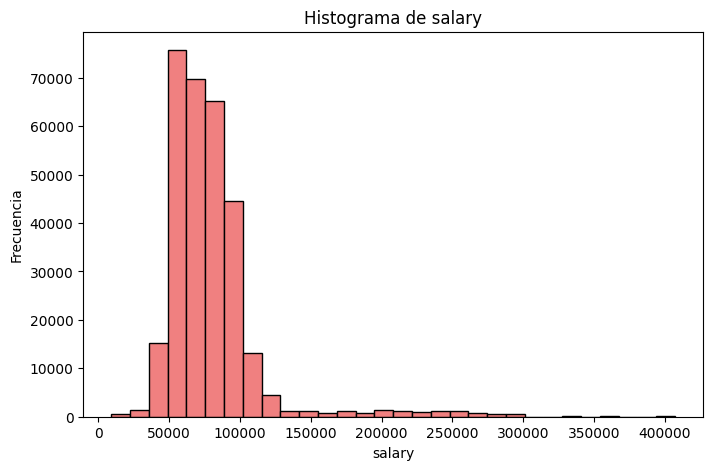

In [23]:
# Visualizamoa la variable Salary para ver su distribución
plt.figure(figsize=(8, 5))
plt.hist(df['Salary'].dropna(), bins=30, color='lightcoral', edgecolor='black')
plt.title('Histograma de salary')
plt.xlabel('salary')
plt.ylabel('Frecuencia')
plt.show()


Dado que el histograma muestra una distribción asimétrica hacia la derecha con valores extremos, se hace la imputación con la mediana por grupo educativo, ya que es más robusta que la media en estos casos, y al agrupar por Education, se respeta las diferencias salariales asociadas al nivel de estudios.
Asimismo, no se usan métodos más avanzados debido a que el caso no requiere tanta complejidad.

In [34]:
# Imputamos los nulos de Salary con la mediana global por grupo de Education
df['Salary'] = df.groupby('Education')['Salary'].transform(lambda x: x.fillna(x.median()))


C:\Users\eguin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [40]:
# imputación global para los que quedaron fuera del grupo
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

In [ ]:
# Comprobamos si queda algún nulo
df.isnull().sum()


In [32]:
# se eliminan las columnas que no aportan valor al análisis
df.drop(['Country', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month', 'Postal Code', 'City','Dollar Cost Points Redeemed', 'CLV'],  axis=1, inplace=True, errors='ignore')

In [45]:
# Finalmente guardamos el DataFrame limpio
df.to_csv('Customer_Flight_Activity_Cleaned.csv')

## Fase 2: Visualización

### 1.- ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [66]:
df = pd.read_csv('Customer_Flight_Activity_Cleaned.csv')

C:\Users\eguin\AppData\Local\Temp\ipykernel_31768\1178977699.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_flights = df.groupby("Month")["Flights Booked"].sum().reset_index()
C:\Users\eguin\AppData\Local\Temp\ipykernel_31768\1178977699.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_flights, x="Month", y="Flights Booked", palette="Blues_d")


        Month  Flights Booked
0     January           96936
1    February           96334
2       March          131199
3       April          112511
4         May          142170
5        June          173242
6        July          193431
7      August          169204
8   September          136379
9     October          129461
10   November          122250
11   December          166047


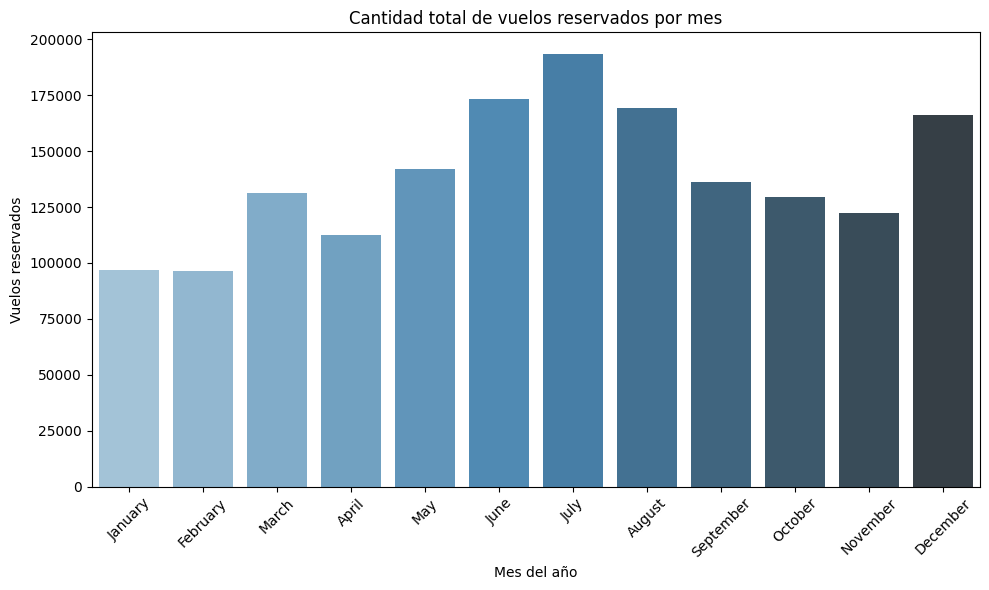

In [68]:

# Orden correcto
orden_meses = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

# Categoría ordenada
df["Month"] = pd.Categorical(df["Month"], categories=orden_meses, ordered=True)

# Agrupación
monthly_flights = df.groupby("Month")["Flights Booked"].sum().reset_index()
print(monthly_flights)

# Gráfico
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=monthly_flights, x="Month", y="Flights Booked", palette="Blues_d")
plt.title("Cantidad total de vuelos reservados por mes")
plt.xlabel("Mes del año")
plt.ylabel("Vuelos reservados")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

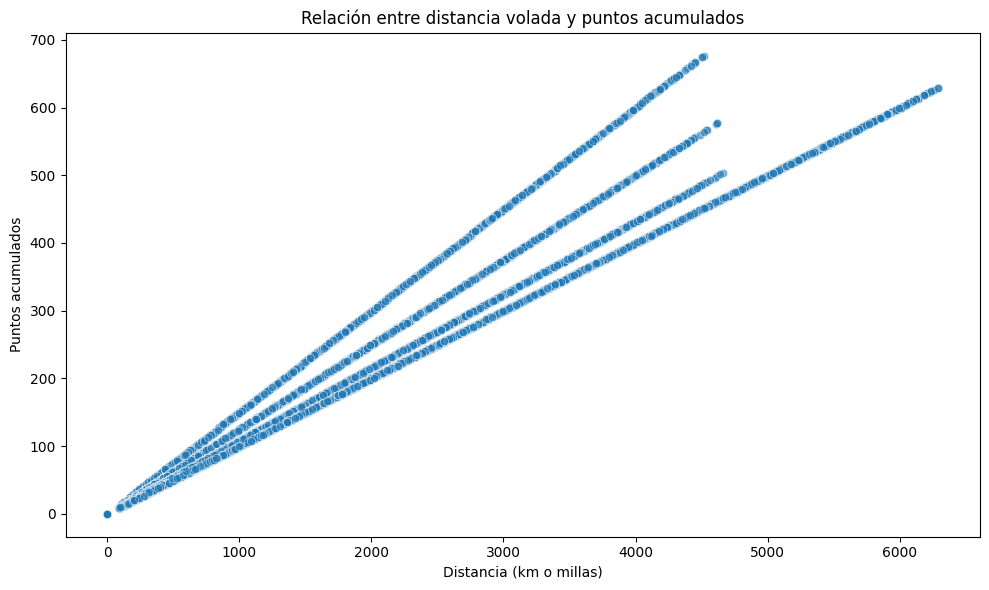

In [69]:
df["Distance"] = pd.to_numeric(df["Distance"], errors="coerce")
df["Points Accumulated"] = pd.to_numeric(df["Points Accumulated"], errors="coerce")

# Elimina filas con valores nulos en estas columnas
df = df.dropna(subset=["Distance", "Points Accumulated"])

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Distance", y="Points Accumulated", alpha=0.6)
plt.title("Relación entre distancia volada y puntos acumulados")
plt.xlabel("Distancia (km o millas)")
plt.ylabel("Puntos acumulados")
plt.tight_layout()
plt.show()

### 3. ¿Cuál es la distribución de los clientes por provincia o estado?


C:\Users\eguin\AppData\Local\Temp\ipykernel_31768\3990544396.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=province_counts, x="Province", y="Cantidad", palette="viridis")


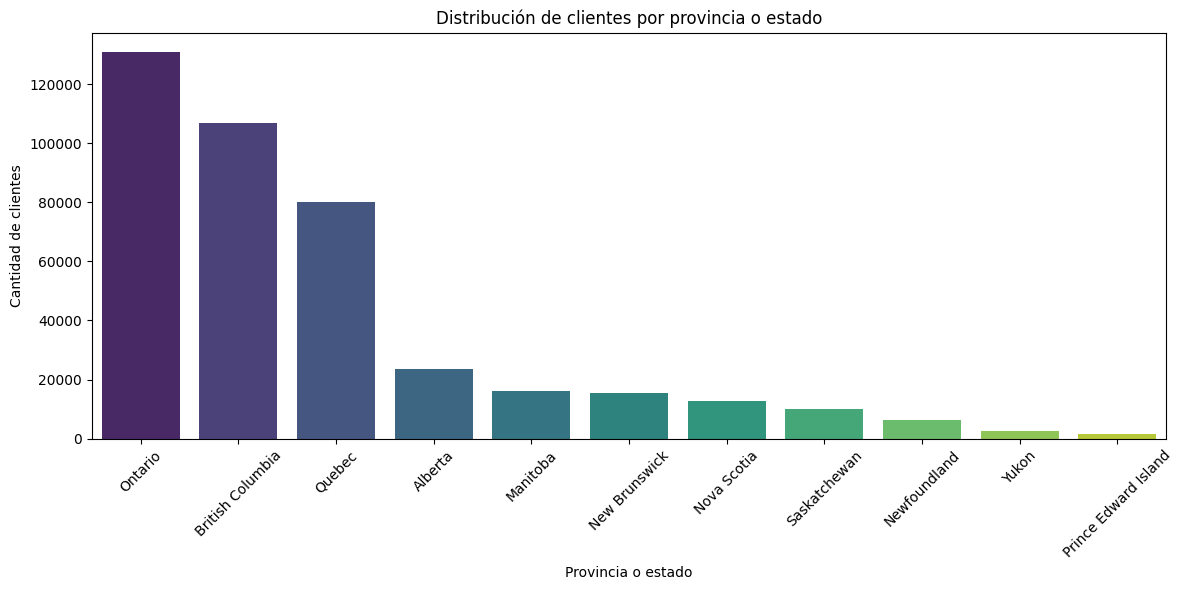

In [70]:
df["Province"] = df["Province"].astype(str).str.strip()

# Contar número de clientes por provincia
province_counts = df["Province"].value_counts().reset_index()
province_counts.columns = ["Province", "Cantidad"]

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(data=province_counts, x="Province", y="Cantidad", palette="viridis")

plt.title("Distribución de clientes por provincia o estado")
plt.xlabel("Provincia o estado")
plt.ylabel("Cantidad de clientes")
plt.xticks(rotation=45)  # Gira etiquetas para que no se encimen
plt.tight_layout()
plt.show()



### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?


C:\Users\eguin\AppData\Local\Temp\ipykernel_31768\4020076874.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Education", y="Salary", estimator="mean", palette="Set2")


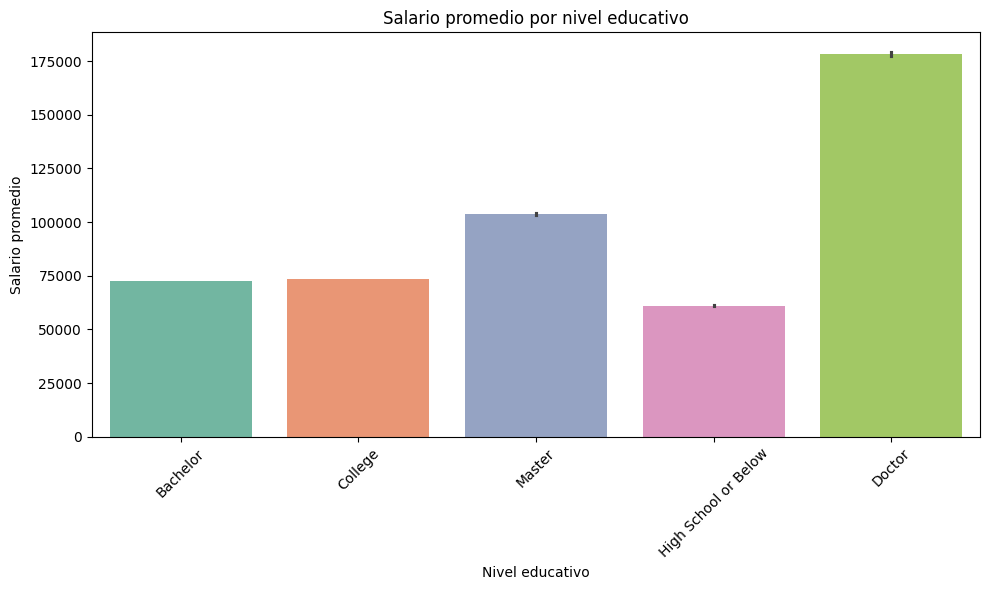

In [71]:
# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="Education", y="Salary", estimator="mean", palette="Set2")

plt.title("Salario promedio por nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Salario promedio")
plt.xticks(rotation=45)  # Por si hay nombres largos
plt.tight_layout()
plt.show()

### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


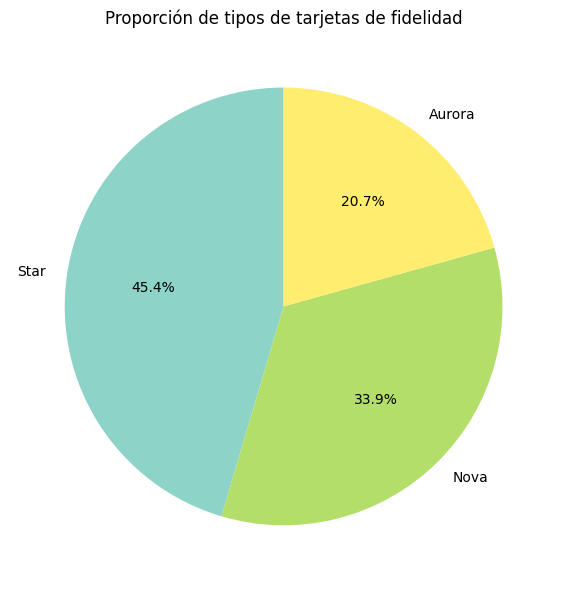

In [72]:
# Contar frecuencia de cada tipo de tarjeta
card_counts = df["Loyalty Card"].value_counts()

# Graficar pie chart
plt.figure(figsize=(6, 6))
card_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap="Set3")

plt.title("Proporción de tipos de tarjetas de fidelidad")
plt.ylabel("")  # Quitamos el texto del eje Y
plt.tight_layout()
plt.show()

### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

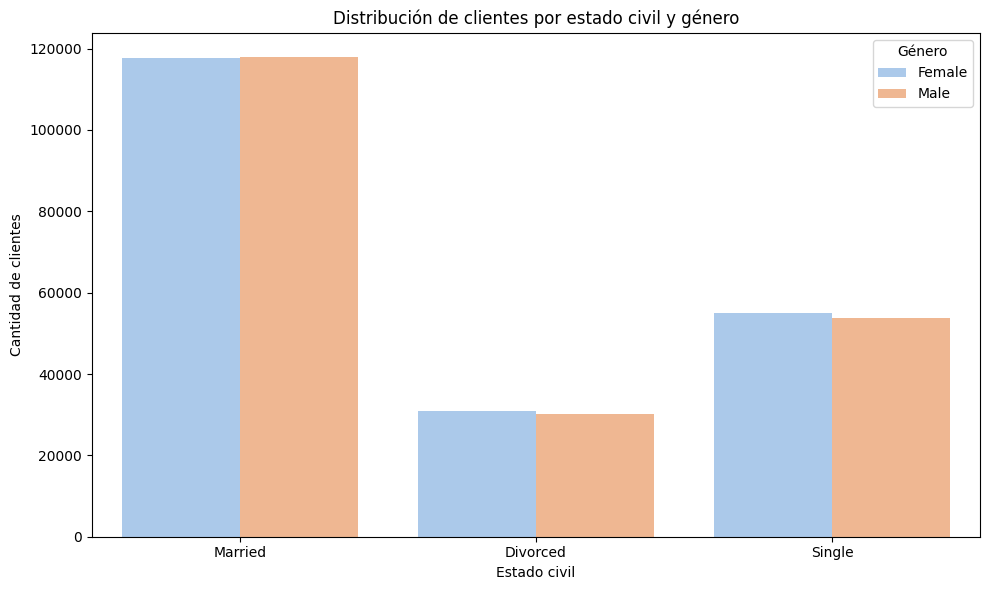

In [73]:
# Gráfico de barras agrupadas
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Marital Status", hue="Gender", palette="pastel")

plt.title("Distribución de clientes por estado civil y género")
plt.xlabel("Estado civil")
plt.ylabel("Cantidad de clientes")
plt.legend(title="Género")
plt.tight_layout()
plt.show()

### Bonus

In [74]:
# Filtrar solo las columnas necesarias
edu_df = df[["Education", "Flights Booked"]].dropna()

# Asegurar que Flights Booked sea numérico
edu_df["Flights Booked"] = pd.to_numeric(edu_df["Flights Booked"], errors="coerce")

In [75]:
# Agrupar por nivel educativo y calcular estadísticas
edu_stats = edu_df.groupby("Education")["Flights Booked"].agg(["mean", "std", "count"]).reset_index()
edu_stats.columns = ["Nivel educativo", "Promedio de vuelos", "Desviación estándar", "Cantidad de casos"]
print(edu_stats)

        Nivel educativo  Promedio de vuelos  Desviación estándar  \
0              Bachelor            4.091093             5.216995   
1               College            4.153012             5.242136   
2                Doctor            4.146281             5.250093   
3  High School or Below            4.155777             5.234551   
4                Master            4.184014             5.210294   

   Cantidad de casos  
0             253752  
1             102672  
2              17856  
3              19008  
4              12336  


In [76]:
from scipy.stats import f_oneway

# Agrupar en listas por nivel educativo
grupos = [group["Flights Booked"].values for name, group in edu_df.groupby("Education")]

# Ejecutar ANOVA
f_stat, p_value = f_oneway(*grupos)

print(f"\nEstadístico F: {f_stat:.3f}")
print(f"Valor p: {p_value:.4f}")

if p_value < 0.05:
    print("✅ Hay diferencias significativas en los vuelos reservados entre los niveles educativos.")
else:
    print("❌ No hay diferencias significativas entre los niveles educativos.")



Estadístico F: 3.673
Valor p: 0.0054
✅ Hay diferencias significativas en los vuelos reservados entre los niveles educativos.


C:\Users\eguin\AppData\Local\Temp\ipykernel_31768\3591377916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=edu_df, x="Education", y="Flights Booked", palette="Set3")


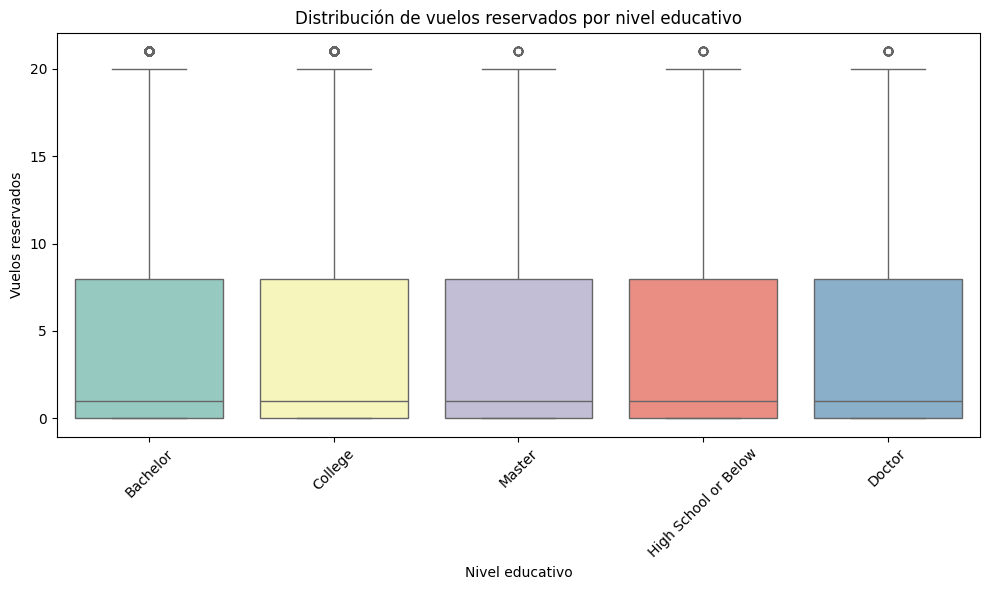

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=edu_df, x="Education", y="Flights Booked", palette="Set3")
plt.title("Distribución de vuelos reservados por nivel educativo")
plt.xlabel("Nivel educativo")
plt.ylabel("Vuelos reservados")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()